In [268]:
data_file = open("C:/Users/shahr/Documents/mnist_dataset/mnist_train.csv" , 'r')
data_list = data_file .readlines()
data_file.close()

In [269]:
len(data_list)

60000

In [270]:
data_list[0]

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [387]:
import numpy
import matplotlib
%matplotlib inline

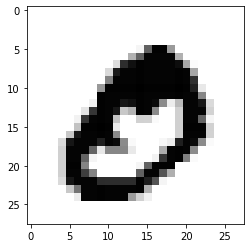

In [388]:
all_values = data_list[63].split(',')
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys',interpolation='None')

In [389]:
scaled_input = (numpy.asfarray(all_values[1:]) / 255 * 0.99) + 0.01
# print(scaled_input)

In [390]:
import numpy
import scipy.special
import matplotlib
%matplotlib inline

class neuralNetwork:
    
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        
        self.lr = learningrate
        
        self.activation_function = lambda x: scipy.special.expit(x)
    
        pass
    
    def train(self, inputs_list, targets_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        target = numpy.array(targets_list, ndmin=2).T
        hidden_inputs = numpy.dot(self.wih , inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        output_errors = target - final_outputs
        hidden_errors = numpy.dot(self.who.T , output_errors)
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)) , numpy.transpose(hidden_outputs))
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)) , numpy.transpose(inputs))
        pass
    
    def query(self, inputs_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        return final_outputs
    
    pass

input_nodes = 784
hidden_nodes = 100
output_nodes = 10

learning_rate = 0.2

n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

training_data_file = open("C:/Users/shahr/Documents/mnist_dataset/mnist_train.csv" , 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

epochs = 5
for e in range(epochs):
    for record in training_data_list:
        all_values = record.split(',')
        inputs = (numpy.asfarray(all_values[1:]) / 255 * 0.99) + 0.01
        targets = numpy.zeros(output_nodes) + 0.01
        targets [int(all_values[0])] = 0.99
        n.train(inputs , targets)
        pass
    pass

In [386]:
print(targets)
print(inputs)

[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.99 0.01]
[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01      

In [391]:
test_data_file = open("C:/Users/shahr/Documents/mnist_dataset/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [392]:
scorecard = []
for record in test_data_list:
    all_values = record.split(',')
    correct_label = int(all_values[0])
#     print(correct_label, "correct label")
    inputs = (numpy.asfarray(all_values[1:]) / 255 * 0.99) + 0.01
    outputs = n.query(inputs)
    label = numpy.argmax(outputs)
#     print(label, "network's answer")
    if(label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    pass

In [393]:
scorecard_array = numpy.asarray(scorecard)
print ("performance = ", scorecard_array.sum() /
scorecard_array.size)

performance =  0.961


In [394]:
import scipy.misc
import matplotlib.pyplot as plt

In [395]:
import cv2

In [653]:
ig = cv2.imread("cur_img.jpeg")
ig = cv2.cvtColor(ig, cv2.COLOR_BGR2GRAY)

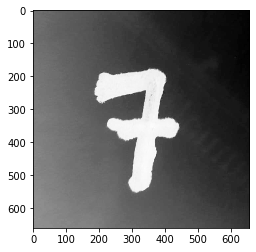

In [654]:
plt.imshow(ig)
matplotlib.pyplot.imshow(ig, cmap='Greys',interpolation='None')
# print(numpy.max(ig))
# print(numpy.min(ig))
# ig[0][0]

In [655]:
ig.shape

(660, 656)

In [656]:
# re_ig0 = cv2.resize(ig[:, :, 0], (28, 28))
# re_ig1 = cv2.resize(ig[:, :, 1], (28, 28))
# re_ig2 = cv2.resize(ig[:, :, 2], (28, 28))
# re_ig = cv2.resize()
re_ig = ig

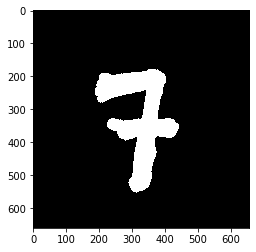

In [657]:
# plt.imshow(re_ig)
re_ig = (ig > 90) * 255
matplotlib.pyplot.imshow(re_ig, cmap='Greys',interpolation='None')

In [658]:
# plt.imshow(re_ig)
re_ig = 255 - re_ig
re_ig = cv2.resize(re_ig, (28, 28))
matplotlib.pyplot.imshow(re_ig, cmap='Greys',interpolation='None')

error: OpenCV(4.5.4) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:3929: error: (-215:Assertion failed) func != 0 in function 'cv::hal::resize'


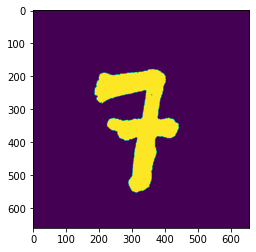

In [659]:
# for i in range(0, 28):
#     for j in range(0, 28):
#         if(re_ig[i][j] >= 100):
#             re_ig[i][j] = 255
#         else:
#             re_ig[i][j] = 0
plt.imshow(re_ig)

In [651]:
input_arr = re_ig.reshape((1, 784))
# print(input_arr)
input_arr.shape

ValueError: cannot reshape array of size 432960 into shape (1,784)

In [610]:
inputs = (numpy.asfarray(input_arr) / 255 * 0.99) + 0.01
outputs = n.query(inputs)
predicted_label = numpy.argmax(outputs)

In [611]:
outputs

array([[1.05535848e-04],
       [2.19752221e-02],
       [9.14218580e-02],
       [2.73999059e-04],
       [8.38427850e-02],
       [4.76245674e-05],
       [8.58001841e-04],
       [8.82051848e-02],
       [8.89764405e-04],
       [6.03511028e-03]])

In [612]:
predicted_label

2

In [583]:
input_arr[0][0]

0

In [522]:
print(input_arr)

[[110 107 107 107 107 106 108 110 105 106 105 105 101 103 106 105 106 107
  107 105 103 103 103 102 103 103 102 100 113 106 107 107 106 107 107 108
  107 106 107 107 108 105 105 106 104 104 104 104 103 102 100 101 100  98
   99  99 109 109 108 106 107 108 107 107 108 107 109 107 110 108 106 106
  104 107 105 101 103 103 102 101 102 100  97  99 109 109 108 109 109 108
  107 107 108 108 109 109 109 110 108 109 105 106 106 104 102 102 100 101
  101 100  99  98 107 107 111 110 108 111 108 110 109 109 110 110 113 113
  110 112 111 113 114 104 103 101 100 101 100  99  98  97 108 107 106 107
  107 113 111 120 205 225 227 228 227 227 223 226 230 228 228 108 103 103
  102  99 100  99  98  98 108 107 106 107 107 226 227 227 225 226 226 227
  225 227 226 224 227 229 226 109 104 104 103 101 101 100  98  99 108 108
  108 106 106 223 226 144 157 110 106 107 105 104 107 228 228 227 109 106
  106 107 103 104 100 100  98  99 109 108 107 106 106 107 105 104 104 105
  107 106 105 104 106 228 228 210 108 